In [32]:
import numpy as np
import pandas as pd
import sklearn
import seaborn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from sklearn.model_selection import cross_val_score

In [33]:
# Load the Excel file
file_path = '/content/Data (18).xlsx'

# Read the two sheets into separate DataFrames
sheet1 = pd.read_excel(file_path, sheet_name='Data_Set')
sheet2 = pd.read_excel(file_path, sheet_name='Predict')

# Append the two DataFrames
df = pd.concat([sheet1, sheet2], ignore_index=True)

In [34]:
df.head()

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,D_Of_Birth,Diagnosis_Type,Chronic_flag,Acute_flag,...,DM2-PAD,DM2-RIF,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke
0,SGH11015,Male,OTHER,PALASTINIAN,5.438750,Non Compliant,1974-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,SGH11016,Male,OTHER,Saudi,6.053896,Compliant,1976-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,SGH11017,Female,OTHER,Saudi,6.099180,Compliant,1955-01-01,Type II,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,SGH11018,Male,OTHER,Saudi,8.804544,Non Compliant,1974-01-01,Type II,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,SGH11019,Male,OTHER,Saudi,8.361621,Compliant,1954-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#name of columns
print(df.columns)

#type of columns
print(df.dtypes)

Index(['Unique_Identifier', 'Gender', 'Religion', 'Nationality',
       'Avg_HBA1C Results', 'HBA1C test Compliance', 'D_Of_Birth',
       'Diagnosis_Type', 'Chronic_flag', 'Acute_flag', 'ER_flag_bef_chronic',
       '# ER_befor_Chr', 'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr',
       'Comorbidity', 'ATrFB', 'Canc', 'DM1-CVS', 'DM1-PAD', 'DM1-RIF',
       'DM2-CVS', 'DM2-PAD', 'DM2-RIF', 'HF', 'HYT', 'IschHD', 'MI', 'Obes',
       'PAD', 'Periodontal', 'Stroke'],
      dtype='object')
Unique_Identifier                object
Gender                           object
Religion                         object
Nationality                      object
Avg_HBA1C Results               float64
HBA1C test Compliance            object
D_Of_Birth               datetime64[ns]
Diagnosis_Type                   object
Chronic_flag                    float64
Acute_flag                        int64
ER_flag_bef_chronic               int64
# ER_befor_Chr                    int64
IP_flag_bef_chr        

In [36]:
# Feature engineering
#calculating age from DOB
df['Age'] = pd.to_datetime('today').year - pd.to_datetime(df['D_Of_Birth']).dt.year

In [37]:
df.head()

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,D_Of_Birth,Diagnosis_Type,Chronic_flag,Acute_flag,...,DM2-RIF,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age
0,SGH11015,Male,OTHER,PALASTINIAN,5.438750,Non Compliant,1974-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,0,50
1,SGH11016,Male,OTHER,Saudi,6.053896,Compliant,1976-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,0,48
2,SGH11017,Female,OTHER,Saudi,6.099180,Compliant,1955-01-01,Type II,0.0,0,...,0,0,1,0,0,0,0,0,0,69
3,SGH11018,Male,OTHER,Saudi,8.804544,Non Compliant,1974-01-01,Type II,0.0,0,...,0,0,1,0,0,0,0,0,0,50
4,SGH11019,Male,OTHER,Saudi,8.361621,Compliant,1954-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,0,70


In [38]:
# Perform value_counts() for all columns
value_counts = {col: df[col].value_counts() for col in df.columns}

# Display the value counts for each column
for col, counts in value_counts.items():
    print(f"Column: {col}")
    print(counts)
    print("-" * 50)

Column: Unique_Identifier
Unique_Identifier
SGH11015       1
SGH11011768    1
SGH11011774    1
SGH11011773    1
SGH11011772    1
              ..
SGH1105899     1
SGH1105900     1
SGH1105901     1
SGH1105902     1
SGH2205036     1
Name: count, Length: 17633, dtype: int64
--------------------------------------------------
Column: Gender
Gender
Male      9567
Female    8066
Name: count, dtype: int64
--------------------------------------------------
Column: Religion
Religion
Islam                             8117
MUSLIM                            4389
OTHER                             2471
ISLAM                             1098
JEWISH                             839
Unknown                            516
Others                             126
Christian                           32
Unknown/Not Known                   11
Not Specified                       10
Catholic                             4
CHRISTIAN                            3
No Religion                          2
Hindu          

In [39]:
# Binary encoding
df['Gender_Encoded'] = df['Gender'].map({'Female': 0, 'Male': 1})

df['HBA1C test Compliance'] = df['HBA1C test Compliance'].map({'Non Compliant': 0, 'Compliant': 1})
df.head()

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,D_Of_Birth,Diagnosis_Type,Chronic_flag,Acute_flag,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
0,SGH11015,Male,OTHER,PALASTINIAN,5.438750,0,1974-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,50,1
1,SGH11016,Male,OTHER,Saudi,6.053896,1,1976-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,48,1
2,SGH11017,Female,OTHER,Saudi,6.099180,1,1955-01-01,Type II,0.0,0,...,0,1,0,0,0,0,0,0,69,0
3,SGH11018,Male,OTHER,Saudi,8.804544,0,1974-01-01,Type II,0.0,0,...,0,1,0,0,0,0,0,0,50,1
4,SGH11019,Male,OTHER,Saudi,8.361621,1,1954-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,70,1


In [40]:
df.isna().sum()

,0
Unique_Identifier,0
Gender,0
Religion,0
Nationality,0
Avg_HBA1C Results,0
HBA1C test Compliance,0
D_Of_Birth,0
Diagnosis_Type,0
Chronic_flag,5022
Acute_flag,0


Chronic_flag 5022 null values are for test data

In [41]:
# Convert Nationality column to title case
df['Nationality'] = df['Nationality'].str.title()
df.head()

,Unique_Identifier,Gender,Religion,Nationality,Avg_HBA1C Results,HBA1C test Compliance,D_Of_Birth,Diagnosis_Type,Chronic_flag,Acute_flag,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
0,SGH11015,Male,OTHER,Palastinian,5.438750,0,1974-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,50,1
1,SGH11016,Male,OTHER,Saudi,6.053896,1,1976-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,48,1
2,SGH11017,Female,OTHER,Saudi,6.099180,1,1955-01-01,Type II,0.0,0,...,0,1,0,0,0,0,0,0,69,0
3,SGH11018,Male,OTHER,Saudi,8.804544,0,1974-01-01,Type II,0.0,0,...,0,1,0,0,0,0,0,0,50,1
4,SGH11019,Male,OTHER,Saudi,8.361621,1,1954-01-01,Type II,0.0,0,...,0,0,0,0,0,0,0,0,70,1


In [42]:
df['Nationality'].value_counts()

,count
Nationality,
Saudi,12521
Egyptian,1584
Yemen,582
Indian,345
Palastinian,306
...,...
North Korean,1
Samoan,1
Swedish,1


it is baised data so i guss it is better to just drop nationlty column till solve it to have only correct data

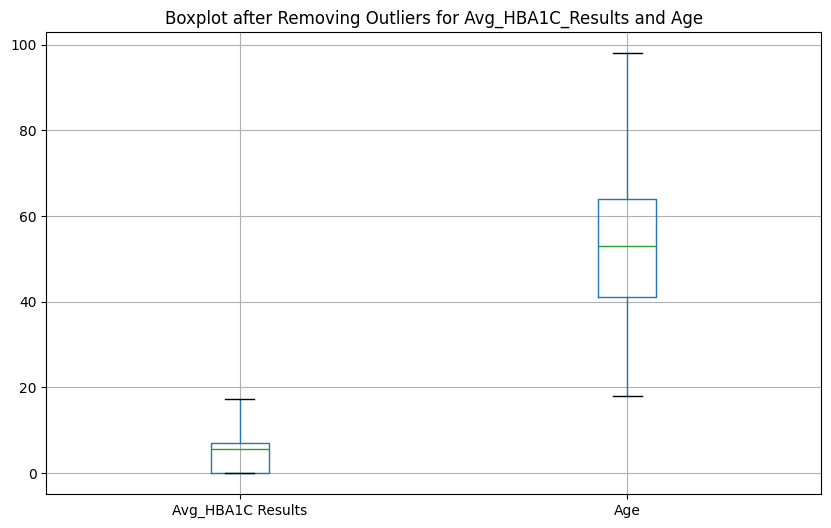

In [43]:
# Function for outlier detection using 1.5xIQR rule
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[df[column].between(lower_bound, upper_bound)]

# Apply outlier detection to specified columns (Avg_HBA1C_Results, Age)
columns_to_check = ['Avg_HBA1C Results', 'Age']

# Remove outliers for each specified column
for column in columns_to_check:
    df = remove_outliers(df, column)

# Display boxplot for the specified columns after removing outliers
plt.figure(figsize=(10, 6))
df.boxplot(column=columns_to_check)
plt.title('Boxplot after Removing Outliers for Avg_HBA1C_Results and Age')
plt.show()

In [44]:
df = df.drop(columns=['Unique_Identifier', 'Gender', 'Religion', 'Nationality', 'D_Of_Birth', 'Diagnosis_Type'])
df.head()

,Avg_HBA1C Results,HBA1C test Compliance,Chronic_flag,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
0,5.438750,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,50,1
1,6.053896,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,48,1
2,6.099180,1,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,69,0
3,8.804544,0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,50,1
4,8.361621,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,70,1


In [45]:
# Separate into train and test data
train_data = df[df['Chronic_flag'].notna()]  # Rows where Chronic_flag is not null
predict_data = df[df['Chronic_flag'].isna()]    # Rows where Chronic_flag is null

In [46]:
#replacing 0 with null values to remove them
train_data['Avg_HBA1C Results'] = train_data['Avg_HBA1C Results'].replace(0,np.NaN)

## showing the count of Nans
print(train_data.isnull().sum())

Avg_HBA1C Results        3453
HBA1C test Compliance       0
Chronic_flag                0
Acute_flag                  0
ER_flag_bef_chronic         0
# ER_befor_Chr              0
IP_flag_bef_chr             0
# IP_bef_chr                0
# OP_Bef_chr                0
Comorbidity                 0
ATrFB                       0
Canc                        0
DM1-CVS                     0
DM1-PAD                     0
DM1-RIF                     0
DM2-CVS                     0
DM2-PAD                     0
DM2-RIF                     0
HF                          0
HYT                         0
IschHD                      0
MI                          0
Obes                        0
PAD                         0
Periodontal                 0
Stroke                      0
Age                         0
Gender_Encoded              0
dtype: int64


<ipython-input-46-206e0b78e6b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Avg_HBA1C Results'] = train_data['Avg_HBA1C Results'].replace(0,np.NaN)


In [16]:
#filling missing values using IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imptr = IterativeImputer(RandomForestRegressor(n_estimators=10), max_iter=50, random_state=44)
train_data = pd.DataFrame(imptr.fit_transform(train_data), columns = train_data.columns)

# showing the count of Nans
print(train_data.isnull().sum())

Avg_HBA1C Results        0
HBA1C test Compliance    0
Chronic_flag             0
Acute_flag               0
ER_flag_bef_chronic      0
# ER_befor_Chr           0
IP_flag_bef_chr          0
# IP_bef_chr             0
# OP_Bef_chr             0
Comorbidity              0
ATrFB                    0
Canc                     0
DM1-CVS                  0
DM1-PAD                  0
DM1-RIF                  0
DM2-CVS                  0
DM2-PAD                  0
DM2-RIF                  0
HF                       0
HYT                      0
IschHD                   0
MI                       0
Obes                     0
PAD                      0
Periodontal              0
Stroke                   0
Age                      0
Gender_Encoded           0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [17]:
train_data.describe()

,Avg_HBA1C Results,HBA1C test Compliance,Chronic_flag,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
count,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,...,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000
mean,6.777461,0.245374,0.284444,0.043199,0.013579,0.018582,0.008576,0.009847,0.423013,0.087747,...,0.008814,0.395537,0.026443,0.003415,0.034702,0.003812,0.001985,0.006035,52.844676,0.539188
std,1.579249,0.430326,0.451167,0.203312,0.115740,0.191474,0.092213,0.111583,1.413641,0.323777,...,0.093474,0.488985,0.160456,0.058337,0.183031,0.061623,0.044513,0.077454,15.034031,0.498482
min,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,5.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
50%,6.465984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,1.000000
75%,7.439940,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,3.000000,21.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000


In [18]:
#set input and output data
train_labels = train_data.columns.drop(['Chronic_flag'])
predict_labels = predict_data.columns.drop(['Chronic_flag'])
X_train = train_data[train_labels]
X_predict = predict_data[predict_labels]
y = train_data.Chronic_flag
print(X_train.shape)
print(X_predict.shape)

(12593, 27)
(5018, 27)


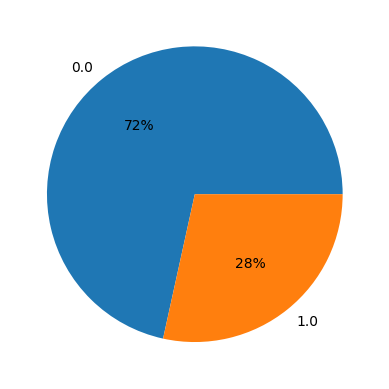

In [19]:
def PlotPie(train_data, nameOfFeature):
    labels = [str(train_data[nameOfFeature].unique()[i]) for i in range(train_data[nameOfFeature].nunique())]
    values = [train_data[nameOfFeature].value_counts()[i] for i in range(train_data[nameOfFeature].nunique())]

    trace=plt.pie(values,labels=labels,autopct='%.0f%%')

    plt.show([trace])

PlotPie(train_data, 'Chronic_flag')

We note that 0 and 1 not equal this may cause overfitting in our model we are going to solve this using SMOT method

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,ATrFB,...,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded,Chronic_flag
0,5.438750,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,50.000000,1.000000,0.0
1,6.053896,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,48.000000,1.000000,0.0
2,6.099180,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,69.000000,0.000000,0.0
3,8.804544,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,50.000000,1.000000,0.0
4,8.361621,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,70.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18017,11.082516,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.396855,0.000000,0.0,0.0,0.0,0.0,0.0,50.000000,1.000000,1.0
18018,8.176665,1.0,0.0,0.573996,0.573996,0.0,0.0,12.556023,0.426004,0.0,...,0.426004,0.426004,0.0,0.0,0.0,0.0,0.0,73.000000,1.000000,1.0
18019,6.043913,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,54.315528,1.000000,1.0
18020,7.213685,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,64.000000,1.000000,1.0


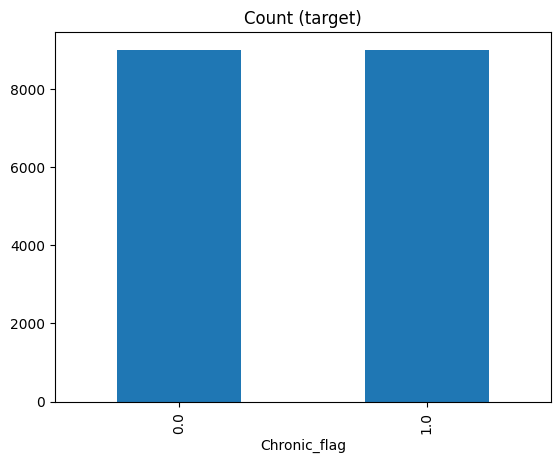

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(n_jobs=-1)#ratio='minority',n_jobs=-1
X_train, y = smote.fit_resample(train_data[train_labels], train_data['Chronic_flag'])

train_data = pd.DataFrame(X_train, columns=train_labels)
train_data['Chronic_flag'] = y

train_data['Chronic_flag'].value_counts().plot(kind='bar', title='Count (target)');

train_data

In [21]:
# Append the two DataFrames
X = pd.concat([X_train, X_predict], ignore_index=True)

In [22]:
#replacing 0 with null values to remove them
X_predict['Avg_HBA1C Results'] = X_predict['Avg_HBA1C Results'].replace(0,np.NaN)

# Drop rows with NaN values in the 'Avg_HBA1C Results' column
X_predict = X_predict.dropna(subset=['Avg_HBA1C Results'])

# Display the updated dataframe shape to confirm the change
print(f"Updated dataframe shape: {X_predict.shape}")

Updated dataframe shape: (3035, 27)


<ipython-input-22-5eacadbaa8fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict['Avg_HBA1C Results'] = X_predict['Avg_HBA1C Results'].replace(0,np.NaN)


In [23]:
from sklearn.preprocessing import StandardScaler
# Define columns that are continuous and need scaling, including columns that start with '#'
continuous_columns = ['Avg_HBA1C Results', 'Age'] + [col for col in X_train.columns if col.startswith('#')]

# Create a StandardScaler object
scaler = StandardScaler()

# Scale only the continuous columns
X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])

X_train.head()

,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,ATrFB,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
0,-0.927972,0.0,0.0,0.0,-0.127569,0.0,-0.109407,-0.404481,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.264656,1.0
1,-0.545378,1.0,0.0,0.0,-0.127569,0.0,-0.109407,-0.404481,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.398812,1.0
2,-0.517213,1.0,0.0,0.0,-0.127569,0.0,-0.109407,-0.404481,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.009819,0.0
3,1.165405,0.0,0.0,0.0,-0.127569,0.0,-0.109407,-0.404481,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.264656,1.0
4,0.889926,1.0,0.0,0.0,-0.127569,0.0,-0.109407,-0.404481,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.076896,1.0


In [24]:
from sklearn.preprocessing import StandardScaler
# Define columns that are continuous and need scaling, including columns that start with '#'
continuous_columns = ['Avg_HBA1C Results', 'Age'] + [col for col in X_predict.columns if col.startswith('#')]

# Create a StandardScaler object
scaler = StandardScaler()

# Scale only the continuous columns
X_predict[continuous_columns] = scaler.fit_transform(X_predict[continuous_columns])

X_predict.head()

<ipython-input-24-f8cb2bab39a8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict[continuous_columns] = scaler.fit_transform(X_predict[continuous_columns])


,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,ATrFB,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
12612,-0.665473,0,0,0,-0.1134,0,-0.126266,-0.281950,0,0,...,0,0,0,0,0,0,0,0,-0.237192,1
12613,1.367828,0,0,0,-0.1134,0,-0.126266,-0.281950,0,0,...,0,1,0,0,0,0,0,0,-0.371698,0
12616,-0.588381,0,0,0,-0.1134,0,-0.126266,-0.281950,0,0,...,0,0,0,0,0,0,0,0,-0.573457,0
12617,-0.742623,0,0,0,-0.1134,0,-0.126266,0.908201,0,0,...,0,0,0,0,0,0,0,0,-0.573457,0
12619,0.392134,0,1,0,-0.1134,0,-0.126266,-0.281950,0,0,...,0,1,0,0,0,0,0,0,1.040617,0


In [25]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler(feature_range=(0, 1))

continuous_columns = ['Avg_HBA1C Results', 'Age'] + [col for col in X_train.columns if col.startswith('#')]


# Scale only the continuous columns
X_train[continuous_columns] = MinMaxScaler.fit_transform(X_train[continuous_columns])

X_train.head()

,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,ATrFB,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
0,0.103779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4000,1.0
1,0.151465,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3750,1.0
2,0.154975,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6375,0.0
3,0.364693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4000,1.0
4,0.330358,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6500,1.0


In [26]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler(feature_range=(0, 1))

continuous_columns = ['Avg_HBA1C Results', 'Age'] + [col for col in X_predict.columns if col.startswith('#')]


# Scale only the continuous columns
X_predict[continuous_columns] = MinMaxScaler.fit_transform(X_predict[continuous_columns])

X_predict.head()

,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,ATrFB,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
12612,0.161558,0,0,0,0.0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.3875,1
12613,0.439944,0,0,0,0.0,0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0.3625,0
12616,0.172113,0,0,0,0.0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.3250,0
12617,0.150995,0,0,0,0.0,0,0.0,0.1,0,0,...,0,0,0,0,0,0,0,0,0.3250,0
12619,0.306358,0,1,0,0.0,0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0.6250,0


In [27]:
X_train.describe()

,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,ATrFB,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
count,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,...,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000,18022.000000
mean,0.219440,0.253459,0.063973,0.019960,0.002943,0.011481,0.004424,0.033952,0.084065,0.003575,...,0.012285,0.424604,0.040141,0.004225,0.031220,0.005505,0.002835,0.007838,0.449319,0.549807
std,0.124641,0.424219,0.232644,0.133126,0.023067,0.099781,0.040439,0.083942,0.307486,0.056816,...,0.101713,0.485484,0.184860,0.060554,0.168964,0.067970,0.048727,0.082046,0.186356,0.488054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000
50%,0.196614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450000,1.000000
75%,0.276588,0.569936,0.000000,0.000000,0.000000,0.000000,0.000000,0.024763,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.587500,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_predict.describe()

,Avg_HBA1C Results,HBA1C test Compliance,Acute_flag,ER_flag_bef_chronic,# ER_befor_Chr,IP_flag_bef_chr,# IP_bef_chr,# OP_Bef_chr,Comorbidity,ATrFB,...,HF,HYT,IschHD,MI,Obes,PAD,Periodontal,Stroke,Age,Gender_Encoded
count,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,...,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.000000,3035.0,3035.000000,3035.000000,3035.000000
mean,0.252670,0.297529,0.041186,0.016145,0.005601,0.018451,0.007029,0.023690,0.107743,0.006590,...,0.011862,0.377265,0.028666,0.004613,0.023723,0.004283,0.0,0.006260,0.431586,0.572982
std,0.136936,0.457246,0.198753,0.126054,0.049402,0.134599,0.055678,0.084037,0.358423,0.080923,...,0.108281,0.484782,0.166892,0.067772,0.152211,0.065318,0.0,0.078887,0.185896,0.494726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.152457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.275000,0.000000
50%,0.208687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.437500,1.000000
75%,0.313584,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.575000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [29]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std
# Model Validation function
def evaluate_model(model, X_train, y):
    """
    Evaluate a given model using Repeated Stratified K-Fold Cross-Validation

    Parameters:
    model (sklearn model): The machine learning model to evaluate
    X (pd.DataFrame or np.array): Feature matrix
    y (pd.Series or np.array): Target variable

    Returns:
    tuple: Mean accuracy and standard deviation of cross-validation scores
    """
    # Initialize Repeated Stratified K-Fold Cross-Validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=44)

    # Evaluate model using cross-validation
    scores = cross_val_score(model, X_train, y, scoring='accuracy', cv=cv, n_jobs=-1)

    # Return the mean and standard deviation of the cross-validation scores
    return mean(scores), std(scores)

In [30]:
from sklearn.neural_network import MLPClassifier

MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu ,tanh
                                   solver='lbfgs',  # can be also sgd , adam ,lbfgs
                                   learning_rate='constant', # can be also invscaling , adaptive ,lbfgs  ,constant
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(300,3),random_state=44)

MLPscore = evaluate_model(MLPClassifierModel, X_train ,y)

print('Mean Accuracy: %.3f (%.3f)' % (mean(MLPscore), std(MLPscore)))
MLPClassifierModel.fit(X_train, y)
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y))

Mean Accuracy: 0.433 (0.425)
MLPClassifierModel Train Score is :  0.8624458994562202


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [50]:
#save the model in pickle format
import pickle
pickle.dump(MLPClassifierModel,open('MLPClassifierModel.pkl','wb'))
print('saved')

saved


In [51]:
MLPClassifierModel_pred=MLPClassifierModel.predict(X_predict)

# Add predictions as a new column to the rearranged DataFrame
X_predict['Chronic_flag'] = MLPClassifierModel_pred

# Save the updated DataFrame to an Excel file
X_predict.to_excel('MLPClassifierModel_output_with_predictions.xlsx', index=False)

print("Data saved to 'MLPClassifierModel_output_with_predictions.xlsx'")

Data saved to 'MLPClassifierModel_output_with_predictions.xlsx'


In [48]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC_Model=RandomForestClassifier(random_state=44, max_features='sqrt', n_estimators= 700, max_depth=18, criterion='entropy')

RFCscore = evaluate_model(RFC_Model , X_train , y)

print('Mean Accuracy: %.3f (%.3f)' % (mean(RFCscore), std(RFCscore)))

RFC_Model.fit(X_train, y)
print('RFC_Model Train Score is : ' , RFC_Model.score(X_train, y))

Mean Accuracy: 0.442 (0.435)
RFC_Model Train Score is :  0.8877483076240151


In [52]:
#save the model in pickle format
import pickle
pickle.dump(RFC_Model,open('RFCClassifier_model.pkl','wb'))
print('saved')

saved


In [57]:
# Ensure X_predict has the same features as X_train
X_predict_cleaned = X_predict[X_train.columns]
RFC_pred=RFC_Model.predict(X_predict_cleaned)

# Add predictions as a new column to the rearranged DataFrame
X_predict_cleaned['Chronic_flag'] = RFC_pred

# Save the updated DataFrame to an Excel file
X_predict_cleaned.to_excel('RFC_Model_output_with_predictions.xlsx', index=False)

print("Data saved to 'RFC_Model_output_with_predictions.xlsx'")

Data saved to 'RFC_Model_output_with_predictions.xlsx'


In [49]:
from sklearn.ensemble import ExtraTreesClassifier
ETModel = ExtraTreesClassifier(random_state=44, max_features='sqrt', n_estimators= 500, max_depth=16, criterion='entropy')

ETscore = evaluate_model(ETModel, X_train ,y)

print('Mean Accuracy: %.3f (%.3f)' % (mean(ETscore), std(ETscore)))

ETModel.fit(X_train, y)
print('ETModel Train Score is : ' , ETModel.score(X_train, y))

Mean Accuracy: 0.428 (0.421)
ETModel Train Score is :  0.8501276217955832


In [54]:
#save the model in pickle format
import pickle
pickle.dump(ETModel,open('ETClassifier_model.pkl','wb'))
print('saved')

saved


In [59]:
# Ensure X_predict has the same features as X_train
ET_X_predict = X_predict[X_train.columns]
ET_pred=ETModel.predict(ET_X_predict)

# Add predictions as a new column to the rearranged DataFrame
ET_X_predict['Chronic_flag'] = ET_pred

# Save the updated DataFrame to an Excel file
ET_X_predict.to_excel('ET_Model_output_with_predictions.xlsx', index=False)

print("Data saved to 'ET_Model_output_with_predictions.xlsx'")

Data saved to 'ET_Model_output_with_predictions.xlsx'


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [500,700],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [18,16],
    'criterion' :['gini', 'entropy']
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y)

# Get the best model and evaluate using the evaluate_model function
best_RFCmodel = grid_search.best_estimator_
mean_accuracy, std_accuracy = evaluate_model(best_RFCmodel, X_train, y)

# Print the best model and its evaluation results
print(f"Best Model: {best_RFCmodel}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Best Model: RandomForestClassifier(max_depth=18, n_estimators=700, random_state=42)
Mean Accuracy: 0.8797
Standard Deviation of Accuracy: 0.0072


In [61]:
print('RFCModel Train Score is : ' , best_RFCmodel.score(X_train, y))

RFCModel Train Score is :  0.8903007435356786


In [62]:
#save the model in pickle format
import pickle
pickle.dump(best_RFCmodel,open('Best_RFCClassifier_model.pkl','wb'))
print('saved')

saved


In [63]:
RFC_X_predict = X_predict[X_train.columns]
RFC_pred=best_RFCmodel.predict(RFC_X_predict)

In [64]:
# Add predictions as a new column to the rearranged DataFrame
RFC_X_predict['Chronic_flag'] = RFC_pred

# Save the updated DataFrame to an Excel file
RFC_X_predict.to_excel('RFC_best_output_with_predictions.xlsx', index=False)

print("Data saved to 'RFC_best_output_with_predictions.xlsx'")

Data saved to 'RFC_best_output_with_predictions.xlsx'
